Import Libraries & DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from string import punctuation 
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

Display Max Columns & Rows

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Load Train & Test DATASET

In [4]:
train_data = pd.read_csv('train.csv',encoding='latin1');
test_data = pd.read_csv('test.csv',encoding='latin1');

CONCATENATE DATASET

In [5]:
df = pd.concat([train_data,test_data])

DISPLAY DATASET

In [6]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


CHECKING DTYPES

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


Removing Unnecessary Charactors

In [8]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)

TOKENIZATION

In [9]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['text'].apply(tokenize_text)

Data Normalization

In [10]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['text'].apply(normalize_text)

Removing Stopwords

In [11]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()        
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

Removing Missing Values

In [12]:
df.dropna(inplace=True)

SENTIMENT VALUECOUNTS

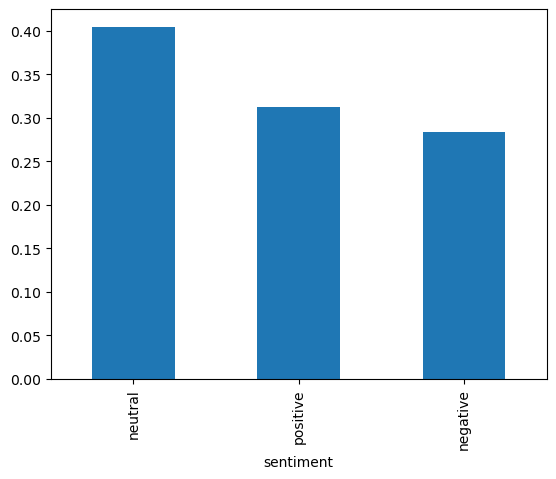

In [13]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

In [14]:
df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

CATEGORIZATION


I'll convert the'sentiment' column in the DataFrame 'df' to categorical data and then encode it as numerical codes. Then I'll calculate the distribution of these emotion codes and plot it in a bar graph

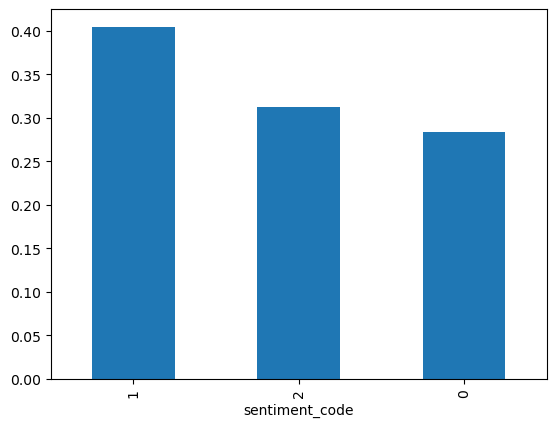

In [15]:
df['sentiment_code'] = df['sentiment'].astype('category').cat.codes
sentiment_distribution = df['sentiment_code'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar')
plt.show()

Visualization Using Histplot

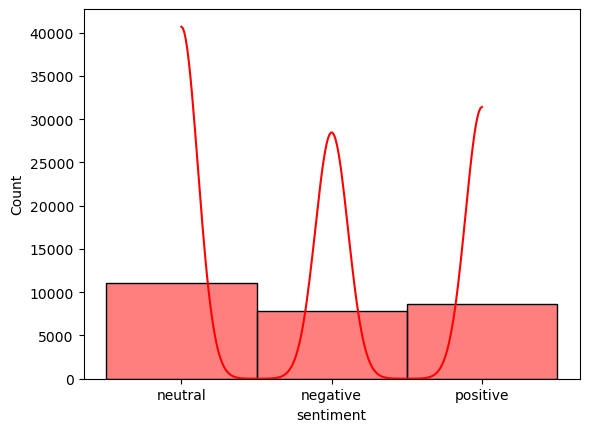

In [16]:
sns.histplot(df['sentiment'], kde=True, color = 'r')
plt.show()

Stems Words Using the Lancaster Stemmer

I removed stopwords and exclamation marks from the data, used a Lancaster stemword to tie words together, and created a text collection from DataFrame. Finally, I'll print the corpus' length and first element

In [17]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

27480
 I`d have responded, if I were going


Word Frequency Distribution

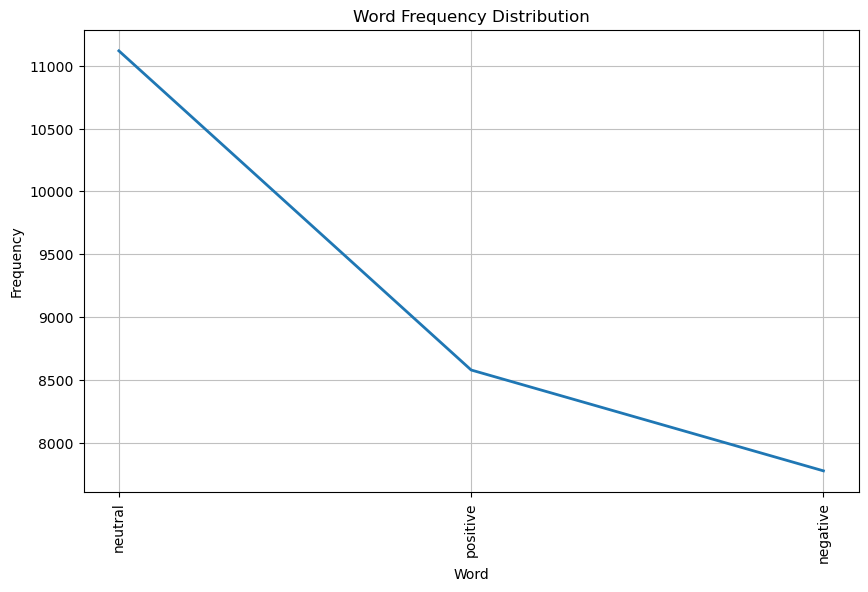

In [18]:
from nltk.probability import FreqDist
word_freq = FreqDist(word_tokenize(' '.join(df['sentiment'])))
plt.figure(figsize=(10, 6))
word_freq.plot(20, cumulative=False)
plt.title('Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

CONVERT To Strings


I've created two columns, "text" and "sentiment", in DataFrameData_eda. The "text" column contains the tweet text converted to strings and stored in a list (final_corpus), while the "sentiment" column contains the sentiment values from the original DataFrame (df)

In [19]:
final_corpus = df['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [20]:
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes
df['Age of User']=df['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})

Removing Irrelevent Columns

In [21]:
df=df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])


PREPROCESS TEXT

I defines a function wp(text) that preprocesses text data by removing URLs, HTML tags, punctuation, newline characters, and alphanumeric words containing digits. I then use this preprocessing function in a DataFrame'selected_text' column named 'DF'

In [22]:
import string
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['selected_text'] = df["selected_text"].apply(wp)

Evaluation of Dataset

In [23]:
X=df['selected_text']
y= df['sentiment']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Creating TF-IDF



In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)


In [26]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

np.float64(0.40454876273653567)

Applying Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
pred_lr=lr.predict(XV_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.8295123726346434

In [30]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1572
     neutral       0.79      0.88      0.83      2236
    positive       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.83      0.83      0.83      5496



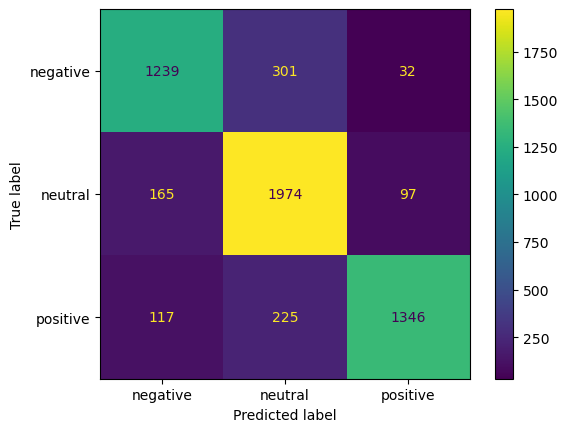

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);

Applying DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
pred_dt = dt.predict(XV_test)

In [34]:
score_dt = dt.score(XV_test, y_test)
score_dt

0.7578238719068413

In [35]:
print(classification_report(y_test, pred_dt))


              precision    recall  f1-score   support

    negative       0.70      0.75      0.72      1572
     neutral       0.76      0.77      0.76      2236
    positive       0.82      0.76      0.79      1688

    accuracy                           0.76      5496
   macro avg       0.76      0.76      0.76      5496
weighted avg       0.76      0.76      0.76      5496



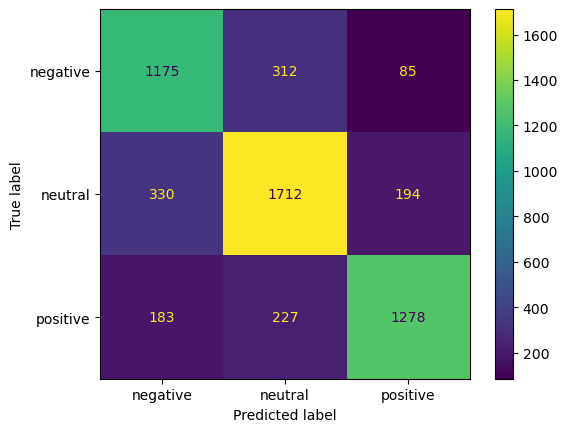

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt);

Applying RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
pred_rfc = rfc.predict(XV_test)

In [39]:
score_rfc = rfc.score(XV_test, y_test)
score_rfc

0.8116812227074236

In [40]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

    negative       0.78      0.75      0.77      1572
     neutral       0.77      0.90      0.83      2236
    positive       0.92      0.75      0.83      1688

    accuracy                           0.81      5496
   macro avg       0.83      0.80      0.81      5496
weighted avg       0.82      0.81      0.81      5496



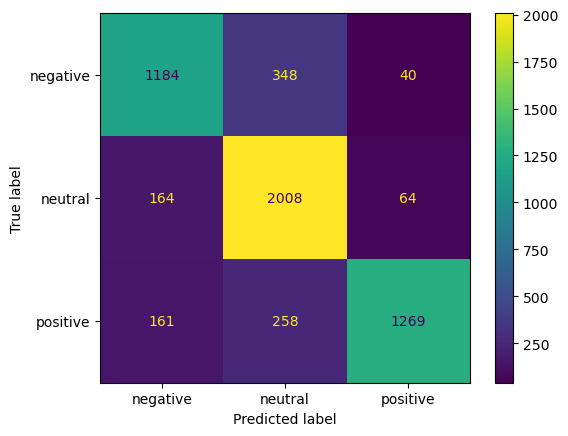

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc);

Results of Predictive Models

In [42]:
print(f'Baseline model:{score_baseline} \nLogistic regression {score_lr}\nDecision Tree Classification {score_dt}\nRandim Forest Classifier {score_rfc}')

Baseline model:0.40454876273653567 
Logistic regression 0.8295123726346434
Decision Tree Classification 0.7578238719068413
Randim Forest Classifier 0.8116812227074236


I've defined functions to predict the sentiment of a text based on machine learning. Output_label() is used to translate numerical sentiment labels into readable text labels. Manual_testing() uses a trained model to make predictions about the sentiment of that text and prints its result using output_label()

In [43]:
def output_lable(n):
    if n == 0:
        return "The Text Sentement is Negative"
    elif n == 1:
        return "The Text Sentement is Neutral"
    elif n == 2:
        return "The Text Sentement is Positive"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print((output_lable(pred_lr[1])))

I'm defining a function manual_testing to convert input text to uppercase, create a DataFrame with a single column named "text" containing the processed text, vectorize the text using a vectorization technique assumed to be defined elsewhere in the code, and return a vectorized representation of the text

In [45]:
def wp(text):
    return text.upper()
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    return new_xv_test
text = "I am Sad"
manual_testing(text)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 15389)>